In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import metrics 
import keras
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt

In [2]:
data_tr = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_tr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = data_tr.drop('label', axis=1).values
y_train = data_tr['label'].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

#Nornalize the data & reshape
X_train = (X_train / 255).reshape(-1,28,28,1)
X_test = (X_test / 255).reshape(-1,28,28,1)

#convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (29400, 28, 28, 1)
X_test shape (12600, 28, 28, 1)
y_train shape (29400, 10)
y_test shape (12600, 10)


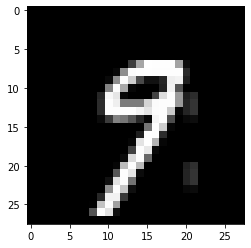

In [9]:
image = X_train[3].reshape((28,28))
plt.figure()
plt.imshow(image, cmap = 'gray')
plt.show()

In [10]:
#Build Model
ml = Sequential()
num_classes = 10

#Convolution layer and Pooling layer
ml.add(keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = (28,28,1)))
ml.add(keras.layers.MaxPool2D(pool_size = (2,2)))
ml.add(keras.layers.Dropout(0.25))

ml.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
ml.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
ml.add(keras.layers.Dropout(0.25))

#Fully Connected Layer
ml.add(keras.layers.Flatten())
ml.add(keras.layers.Dense(256, activation = 'relu'))
ml.add(keras.layers.Dropout(0.5))
ml.add(keras.layers.Dense(num_classes, activation = 'softmax'))

otmz = Adam(learning_rate = 0.001)

ml.compile(optimizer = otmz, loss = 'categorical_crossentropy', metrics = ['accuracy'])

ml.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [11]:
#Train the model
ml.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
294/294 [==============================] - 11s 34ms/step - loss: 0.4039 - accuracy: 0.8691
Epoch 2/10
294/294 [==============================] - 10s 34ms/step - loss: 0.1190 - accuracy: 0.9641
Epoch 3/10
294/294 [==============================] - 10s 34ms/step - loss: 0.0904 - accuracy: 0.9724
Epoch 4/10
294/294 [==============================] - 10s 34ms/step - loss: 0.0699 - accuracy: 0.9781
Epoch 5/10
294/294 [==============================] - 10s 34ms/step - loss: 0.0632 - accuracy: 0.9804
Epoch 6/10
294/294 [==============================] - 10s 35ms/step - loss: 0.0548 - accuracy: 0.9834
Epoch 7/10
294/294 [==============================] - 10s 34ms/step - loss: 0.0490 - accuracy: 0.9839
Epoch 8/10
294/294 [==============================] - 10s 34ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 9/10
294/294 [==============================] - 10s 36ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 10/10
294/294 [==============================] - 10s 34ms/step - loss: 0.038

In [12]:
score = ml.evaluate(X_test, y_test)
print('Test loss: %.6f'% score[0])
print('Test accuracy %.6f'% score[1])

394/394 [==============================] - 2s 4ms/step - loss: 0.0300 - accuracy: 0.9908
Test loss: 0.030040
Test accuracy 0.990794
